# Linear Regression on housing dataset

### Import dataset and make a basic analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders.target_encoder import TargetEncoder
%matplotlib inline

In [2]:
houses = pd.read_csv('kc_house_data.csv')

In [3]:
houses.drop(['id'],axis=1,inplace=True) #holds no useful information for the model
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Zipcodes<br>
Zipcodes play a big part in this dataset. Basically, everything about it's surrounding distribution of genders, salaries, and even tax payers will be encoded into them. The easiest approach is to create dummy variables from zipcodes. But I think this is inefficient, because our model breaks apart as soon as we get a new entry, with a zipcode that is not present in our dataset. Thus we lose any potential of this model.<br>
<br>
<br>
##### Zipcode approach<br>
The first logical approach is slightly better than dummy variables. We create a target encoder, which will take 'price' as its target. By doing this, we preserve the information on 'wealthy' regions of Seattle. If our approach was to use random forest, then this wouldn't be such a problem. But in Linear Regression, there might be a case where we might have zipcodes 1,5,15,25 where 1,15,25 is where 'common' people live with low household price, and 15 is the 'super expensive' region of the city. Linear model wouldn't be able to capture this relation in the data and information would be lost. <br> 

In [4]:
houses.dtypes #check dtypes for any non-numerical data

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
houses.describe(percentiles=[.1,.3,.5,.7,.8,.9,.95])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
10%,2.450000e+05,2.000000,1.000000,1090.000000,3.322200e+03,1.000000,0.000000,0.000000,3.000000,6.000000,970.000000,0.000000,1926.000000,0.000000,98008.000000,47.350300,-122.372000,1256.000000,3666.600000
30%,3.450000e+05,3.000000,1.750000,1520.000000,5.612000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1260.000000,0.000000,1956.000000,0.000000,98038.000000,47.496900,-122.312000,1550.000000,5625.600000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
70%,5.950000e+05,4.000000,2.500000,2400.000000,9.800000e+03,2.000000,0.000000,0.000000,4.000000,8.000000,2040.000000,430.000000,1991.000000,0.000000,98115.000000,47.661600,-122.152000,2230.000000,9529.000000
80%,7.001080e+05,4.000000,2.500000,2730.000000,1.218660e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2410.000000,700.000000,2001.000000,0.000000,98125.000000,47.690800,-122.094000,2510.000000,11094.200000
90%,8.870000e+05,4.000000,3.000000,3250.000000,2.139760e+04,2.000000,0.000000,0.000000,4.000000,9.000000,2950.000000,970.000000,2007.000000,0.000000,98155.000000,47.727900,-122.022000,2930.000000,17852.400000


Grade must have a direct influence on the price. Max value '13' seems odd, maybe it's an outlier or an error in the dataset. Because 95% of our data goes up to grade 10. 

In [6]:
houses.loc[houses.grade>=10].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.636000e+03,1636.000000,1636.000000,1636.000000,1.636000e+03,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000
mean,1.257985e+06,3.993888,3.197433,3872.571516,3.212285e+04,1.913203,0.036064,0.808680,3.221883,10.377751,3400.827017,471.744499,1990.249389,86.785452,98059.146088,47.593749,-122.152046,3216.406479,23907.644254
std,7.068484e+05,0.815724,0.802368,1091.119840,7.409831e+04,0.389208,0.186505,1.343945,0.509516,0.626895,958.576536,676.578142,21.868977,407.579112,46.446102,0.097525,0.129229,769.182958,47695.173435
min,3.160000e+05,0.000000,0.000000,1180.000000,6.090000e+02,1.000000,0.000000,0.000000,2.000000,10.000000,780.000000,0.000000,1900.000000,0.000000,98001.000000,47.179500,-122.462000,1180.000000,967.000000
25%,8.128750e+05,4.000000,2.500000,3180.000000,8.528750e+03,2.000000,0.000000,0.000000,3.000000,10.000000,2760.000000,0.000000,1987.000000,0.000000,98027.000000,47.550300,-122.229000,2760.000000,8436.500000
50%,1.038500e+06,4.000000,3.250000,3700.000000,1.298400e+04,2.000000,0.000000,0.000000,3.000000,10.000000,3330.000000,0.000000,1995.000000,0.000000,98053.000000,47.599300,-122.144000,3210.000000,12081.500000
75%,1.488000e+06,4.000000,3.500000,4350.000000,2.485175e+04,2.000000,0.000000,2.000000,3.000000,11.000000,3920.000000,940.000000,2004.000000,0.000000,98075.000000,47.650125,-122.056000,3690.000000,20699.500000
max,7.700000e+06,9.000000,8.000000,13540.000000,1.024068e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.774900,-121.721000,6210.000000,871200.000000


'date' field is in object format. It should be transformed to datetime object and then information can be extracted in order to be used later on. An interesting thing to notice is waterfront column. Min is 0, max is 1, but what matters is the mean. It is extremely low, which means most rows have waterfront = 0, which might be a useful feature, which indicates high price households.

### Baseline (no preprocessing)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

folds = KFold(len(houses),n_folds=10,random_state=42)
lr = LinearRegression()
cross = cross_val_score(lr,houses.drop(['price','date'],axis=1),y=houses.price,cv=folds,n_jobs=-1)
print('Mean: ',cross.mean())

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July

Mean:  0.6951875247730344


Text(0,0.5,'Count')

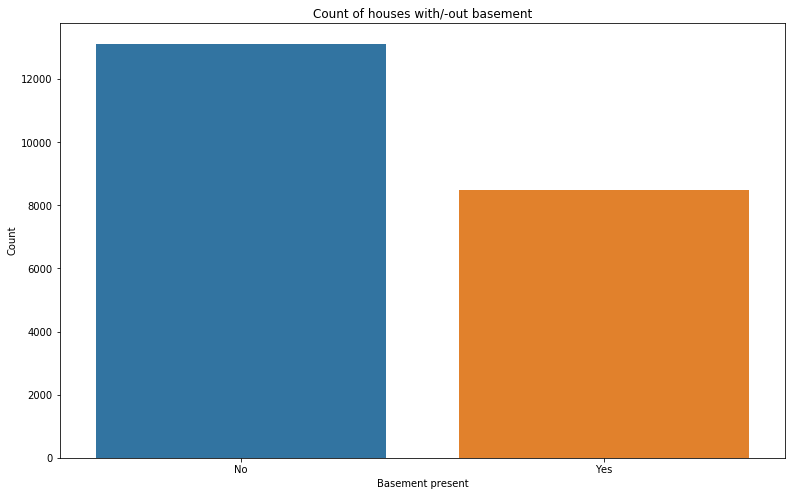

In [8]:
fig,ax = plt.subplots(figsize=(13,8))
count = sns.countplot(['Yes' if x>0 else 'No' for x in houses.sqft_basement],ax=ax)
count.set_title('Count of houses with/-out basement')
count.set_xlabel('Basement present')
count.set_ylabel('Count')

My hypothesis about basements was wrong. 2/5 of all rows contain a value for sqft_basement, which is a considerable amount.

In [9]:
from datetime import date, datetime

dummy_year = 2000 #add leap day
# 1 - winter, 2 - spring, 3 - summer, 4 - autumn
seasons = [(1, (date(dummy_year,  1,  1),  date(dummy_year,  3, 20))),
           (2, (date(dummy_year,  3, 21),  date(dummy_year,  6, 20))),
           (3, (date(dummy_year,  6, 21),  date(dummy_year,  9, 22))),
           (4, (date(dummy_year,  9, 23),  date(dummy_year, 12, 20))),
           (1, (date(dummy_year, 12, 21),  date(dummy_year, 12, 31)))]

def get_season(now):
    now = now.replace(year=dummy_year)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

def since_renovation(x):
    if x.renovated==0:
        return x.year - x.yr_renovated
    return x.year - x.yr_built

houses['date'] = pd.to_datetime(houses['date'],format="%Y%m%dT%f")
houses['year'] = houses.date.dt.year
houses['month'] = houses.date.dt.month
houses['day'] = houses.date.dt.day
houses['weekday'] = houses.date.apply(lambda x: x.weekday())
houses['season'] = houses.date.apply(lambda x: get_season(x.date()))
houses['sqft_bed'] = houses.bedrooms / houses.sqft_living
houses['renovated'] = np.where(houses.yr_renovated>0,1,0)
houses['since_renovation'] = houses.apply(lambda x: since_renovation(x),axis=1)
houses['total_rooms'] = houses.bathrooms+houses.bedrooms
houses['rooms_per_floor'] = houses.total_rooms/houses.floors
houses['changed_living'] = abs(houses.sqft_living-houses.sqft_living15)
houses['changed_lot'] = abs(houses.sqft_lot-houses.sqft_lot15)

### Location <br>
Main feature we can extract from lat/long is the distance from downtown Seattle. The closer - the more expensive household will be.

In [10]:
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='house_prediction')
city = geolocator.geocode('Seattle')
seattle = (city.latitude,city.longitude)
def get_km_from_city_center(x):
    location_tup = (x.lat,x.long)
    return geodesic(seattle,location_tup).kilometers
houses['km_from_center'] = houses.apply(lambda x: get_km_from_city_center(x),axis=1)

### Zipcodes <br>
I will use a website called <a href="www.city-data.com">city-data</a> to extract useful features from zipcodes such as median household value, gross income, district population and others.

In [11]:
from bs4 import BeautifulSoup
import urllib3 as ur
import lxml
import re
from urllib.request import urlopen

zipcodes = houses.zipcode.unique()

def get_info(page):
    info = []
    info.append(int(page_pyt.find(text='Estimated zip code population in 2016:').next_element.strip().replace(',','')))
    info.append(int(page_pyt.find(text='High school or higher:').next_element.strip().replace('%','').replace('.',''))/1000)
    info.append(int(page_pyt.find(text='Bachelor\'s degree or higher:').next_element.strip().replace('%','').replace('.',''))/1000)
    info.append(int(page_pyt.find(text='Graduate or professional degree:').next_element.strip().replace('%','').replace('.',''))/1000)
    info.append(int(page_pyt.find(text='Unemployed:').next_element.strip().replace('%','').replace('.',''))/1000)
    info.append(int(page_pyt.find(text='Estimated median house/condo value in 2016:').next_element.strip().replace(',','').replace('$','')))
    info.append(int(page_pyt.find(text='Average Adjusted Gross Income (AGI) in 2012:').next_element.strip().replace(',','').replace('$','')))
    return info 

zip_information = []
for i,zipcode in enumerate(zipcodes):
    print('%d/%d'%(i+1,len(zipcodes)))
    page = 'http://www.city-data.com/zips/{}.html'.format(zipcode)
    page = urlopen(page)
    page_pyt = BeautifulSoup(page,'lxml')
    zip_information.append(get_info(page_pyt))

print('done')
zips = pd.DataFrame(zip_information,columns=['population','hs','bachelors','graduated','unemployed','median_house_value','average_income'])
zips['zipcode'] = zipcodes
houses_zips = pd.merge(houses,zips,how='left',on='zipcode')

1/70
2/70
3/70
4/70
5/70
6/70
7/70
8/70
9/70
10/70
11/70
12/70
13/70
14/70
15/70
16/70
17/70
18/70
19/70
20/70
21/70
22/70
23/70
24/70
25/70
26/70
27/70
28/70
29/70
30/70
31/70
32/70
33/70
34/70
35/70
36/70
37/70
38/70
39/70
40/70
41/70
42/70
43/70
44/70
45/70
46/70
47/70
48/70
49/70
50/70
51/70
52/70
53/70
54/70
55/70
56/70
57/70
58/70
59/70
60/70
61/70
62/70
63/70
64/70
65/70
66/70
67/70
68/70
69/70
70/70
done


### Relationship visualization

Now we can get a quick feel of our data by plotting a histogram for each numerical value.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1109b6d68>,
      dtype=object)

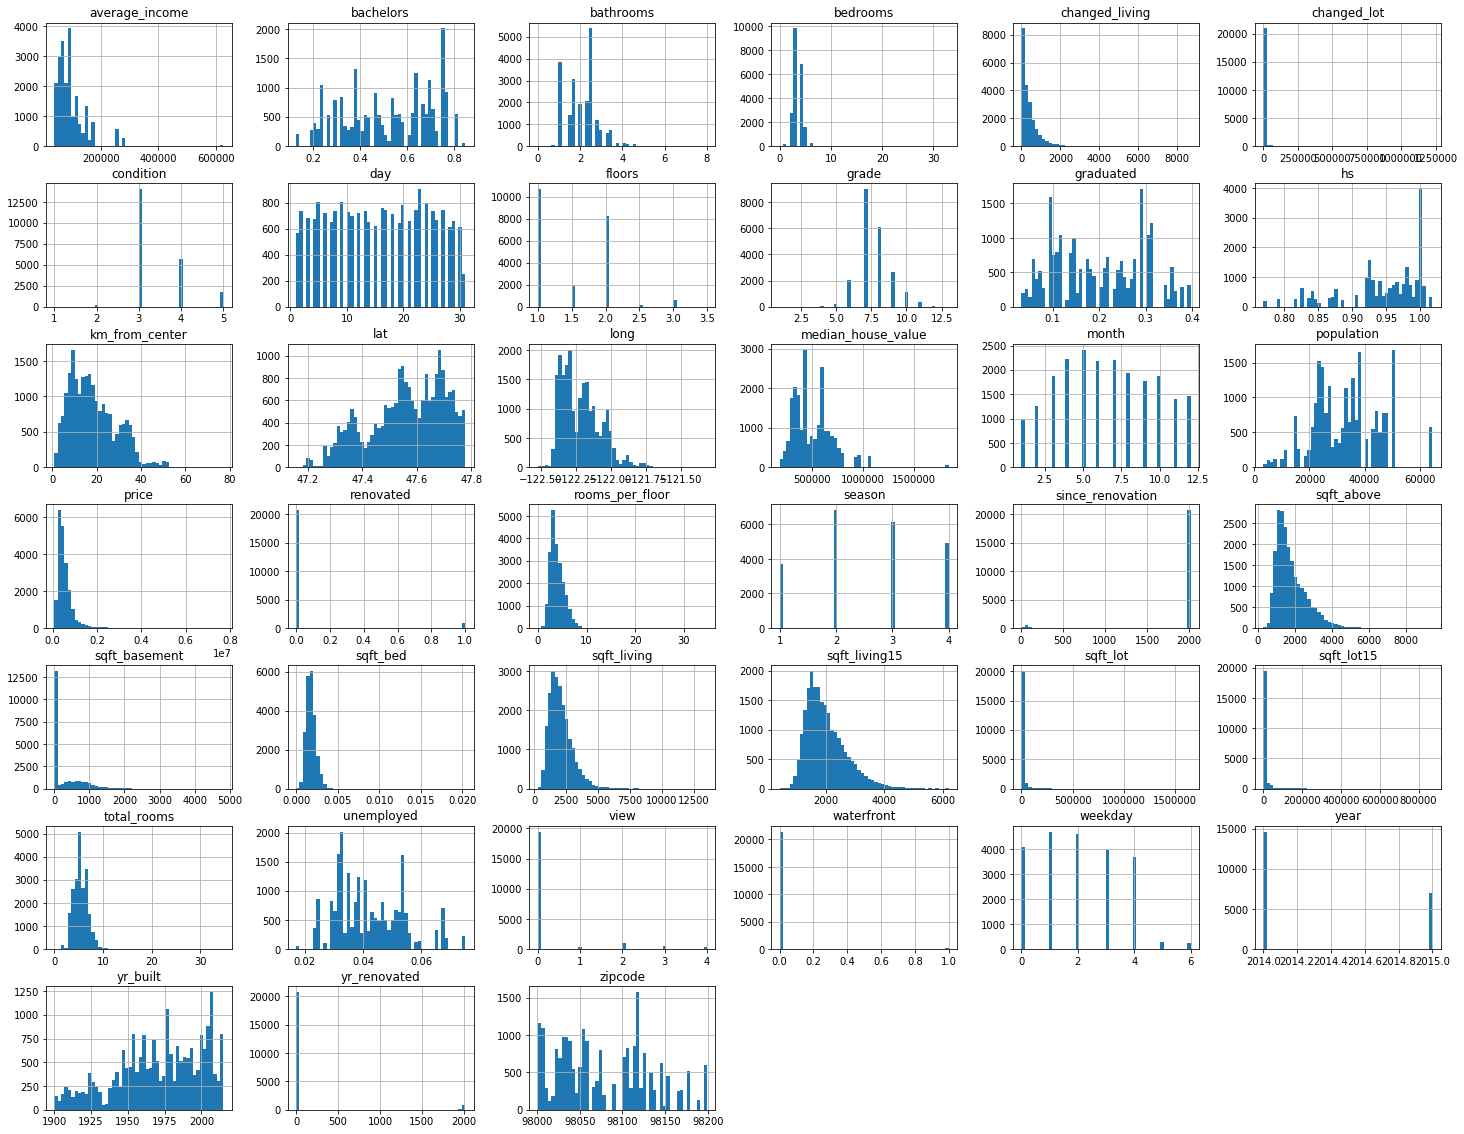

In [12]:
houses_zips.hist(bins=50,figsize=(25,20))

A lot of information can be extracted from this visualization.
- Houses are rarely renovated
- Most houses have >=3 condition
- Houses are usually priced on the medium to lower spectrum, rather than medium to high. This might mean that we do not operate with many rich people.
- There are houses with 1.5 floors, lol

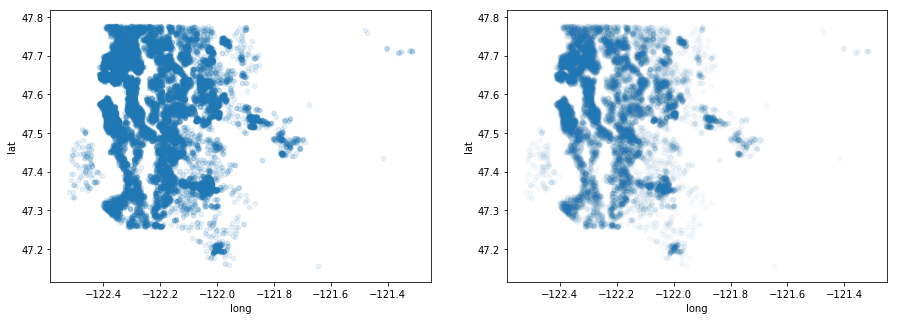

In [13]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
houses.plot(kind='scatter',x='long',y='lat',alpha=0.1,ax=axs[0])
houses.plot(kind='scatter',x='long',y='lat',alpha=0.03,ax=axs[1])

Now we see much better see house locations and can clearly identify dense points. But let's go further and plot it on a map.

In [14]:
import folium
from utils import *

houses['latitude'] = houses.lat
houses['longitude'] = houses.long
houses['price_$'] = houses.price.apply(lambda x: '%.1fK$'%(x/1000))
def plot_houses_on_map(dataframe,annotation_col,map_theme = 'OpenStreetMap'):
    columns_of_interest = dataframe[['longitude','latitude',annotation_col]]
    columns_of_interest = columns_of_interest[~((columns_of_interest['latitude'].isna()) | (columns_of_interest['longitude'].isna()))]
    map_orgs = folium.Map(location=dataframe.iloc[0][['lat','long']].values.tolist(), zoom_start=9,tiles=map_theme)
    MarkerClusterScript(columns_of_interest.to_json(orient="records"), callback=create_marker,popup=annotation_col).add_to(map_orgs)
    return map_orgs

my_map = plot_houses_on_map(houses,'price_$')
my_map.save('map_with_price.html')

/usr/local/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [15]:
locationlist = houses[['lat','long']].values.tolist()
map = folium.Map(location=[56, -3], zoom_start=1)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)

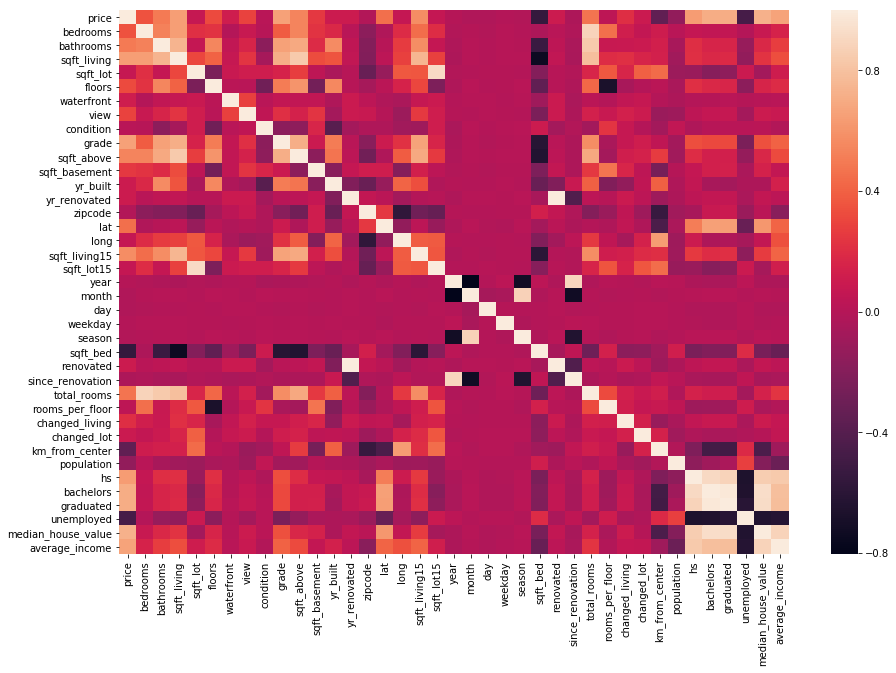

In [16]:
corr = houses_zips.corr(method='spearman')
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [17]:
corr['price'].sort_values(ascending=False)

price                 1.000000
median_house_value    0.728328
bachelors             0.705388
graduated             0.705174
average_income        0.661891
grade                 0.658215
sqft_living           0.644191
hs                    0.634453
sqft_living15         0.572290
sqft_above            0.541752
bathrooms             0.497160
total_rooms           0.475273
lat                   0.456409
bedrooms              0.344652
floors                0.322347
view                  0.293931
sqft_basement         0.251704
changed_living        0.209361
waterfront            0.115089
yr_built              0.102038
yr_renovated          0.101876
renovated             0.101026
changed_lot           0.092009
sqft_lot              0.074939
long                  0.063537
sqft_lot15            0.062766
rooms_per_floor       0.036646
condition             0.018490
year                  0.004138
weekday              -0.002751
zipcode              -0.008735
season               -0.009925
month   

The correlations for price is actually quite logical. The lighter the square - the higher it's correlation. Newly created dates are not correlated, as they should be. But they could have no meaning for our prediction. This hypothesis should be tested. Zipcode information brought on a lot of useful information. Multiple features are very highly correlated with price. This should give Linear Regression a boost. But 'zero correlation' doesn't mean it's a bad feature to predict on. It only means that there is no LINEAR dependancy between the variables.

In [18]:
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
price = houses_zips['price']
no_price_house = houses_zips.drop(['date','price'],axis=1)

te = TargetEncoder(cols=['zipcode'])
te.fit(no_price_house, price)
encoded = te.transform(no_price_house)

scaler = StandardScaler()
encoded_set = scaler.fit_transform(no_price_house)

I will use TargetEncoder in attempt to give zipcode more meaning for a linear model by using mean zipcode target and encode them. Otherwise it is just a useless column for linear models.

In [19]:
encoded_set = np.append(encoded_set,encoded.zipcode.values.reshape(21613,1),1)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(encoded_set,price,test_size=0.2,random_state=42)

In [21]:
lr = LinearRegression(n_jobs=-1)
lr.fit(x_train,y_train)
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test,lr.predict(x_test)))
print(lr.score(x_test, y_test))

29548574121.738495
0.8045428182646674


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


### Linear regression learning curve

Best train:  159658.96764214511
Best test:  172573.92223745974


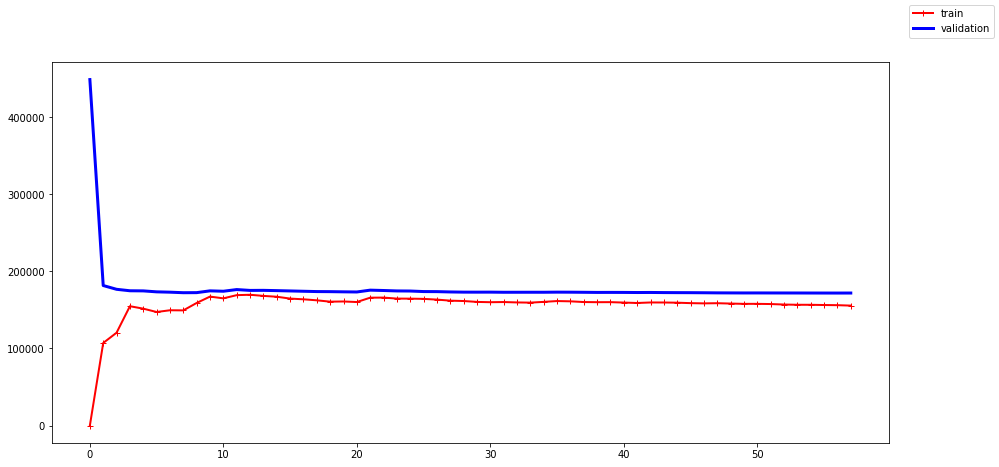

In [26]:
def plot_learning_curve(model,x,y,verbose=False):
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
    train_errors, val_errors = [], []
    for m in range(1,len(x_train),300):
        if verbose:
            print(m,len(x_train))
        model.fit(x_train[:m],y_train[:m])
        y_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_test)
        train_errors.append(mean_squared_error(y_train[:m],y_predict))
        val_errors.append(mean_squared_error(y_test,y_val_predict))
    ax,fig = plt.subplots(figsize=(15,7)) 
    train_errors = np.sqrt(train_errors)
    val_errors = np.sqrt(val_errors)
    plt.plot(train_errors, 'r-+',linewidth=2,label='train')
    plt.plot(val_errors,'b-',linewidth=3,label='validation')
    ax.legend()
    print('Best train: ',train_errors[np.argmin(train_errors[15:])])#do not include early samples
    print('Best test: ',val_errors[np.argmin(val_errors[15:])])
lr = LinearRegression(n_jobs=-1)
plot_learning_curve(lr,encoded_set,price)

With more data on the training set, model becomes overfit to the training data, so probably the optimal value is at about 22*300+1 set of training set.

## Polynomial regression

Best train:  0.0
Best test:  133547.20788679685


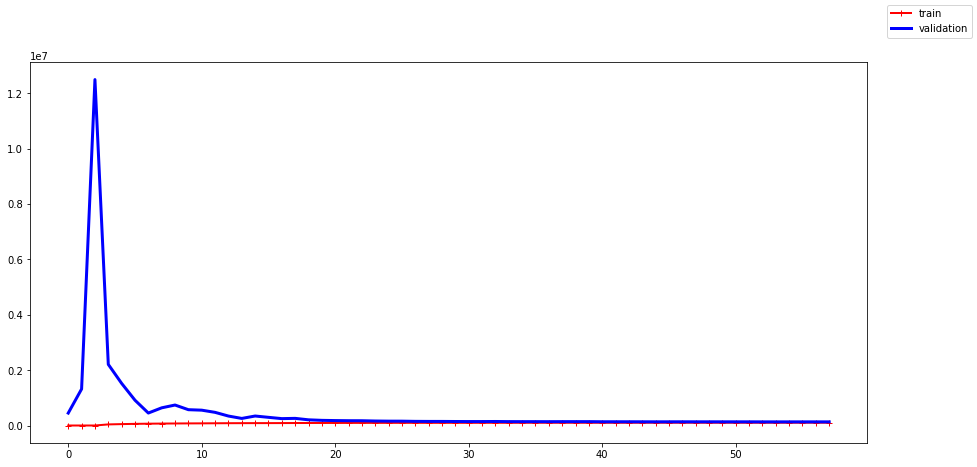

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = Pipeline((
    ('poly_features',PolynomialFeatures(degree=2,include_bias=False)),
    ('lin_reg',LinearRegression(n_jobs=-1))
))
plot_learning_curve(polynomial_regression,encoded_set,price)

## Stochastic Gradiest Descent Regressor

Best train:  4.370353819237682e+19
Best test:  4.3900659162231366e+19


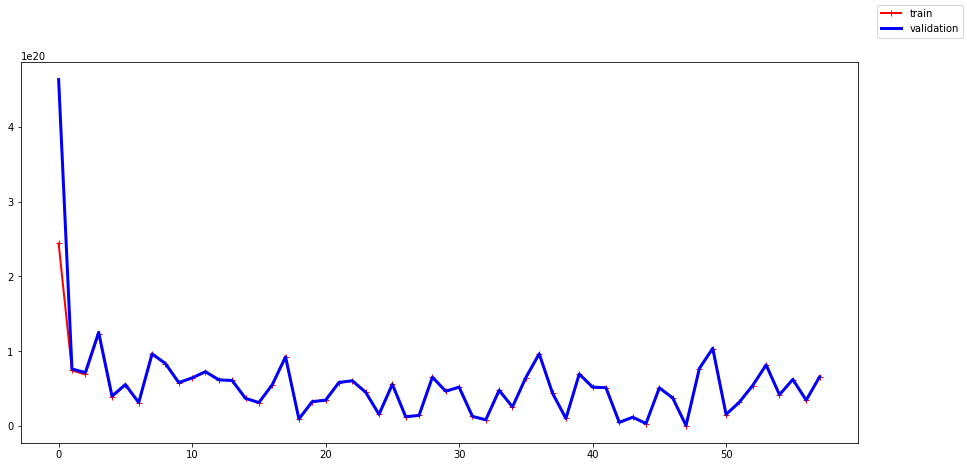

In [24]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=250,alpha=0.003)
plot_learning_curve(sgd_reg,encoded_set,price)

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
x_train, x_test,y_train,y_test = train_test_split(houses_zips.drop(['date','grade'],axis=1),houses_zips.grade,test_size=0.2,random_state=42)
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(x_train,y_train)
pred_y = logreg.predict(x_train)
pred_val = logreg.predict(x_test)
print('MSE(test): ',mean_squared_error(y_test,pred_val))
print('Score test: ',logreg.score(x_test,y_test))
print('Score train: ',logreg.score(x_train,y_train))

MSE(test):  0.7143187601202868
Score test:  0.5244043488318297
Score train:  0.5220936957779063


### Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_y = dt.predict(x_train)
pred_val = dt.predict(x_test)
print('MSE(test): ',mean_squared_error(y_test,pred_val))
print('Score test: ',dt.score(x_test,y_test))
print('Score train: ',dt.score(x_train,y_train))

MSE(test):  36762685785.54221
Score test:  0.7568230897687428
Score train:  1.0


### Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(x_train,y_train)
pred_y = rf.predict(x_train)
pred_val = rf.predict(x_test)
print('MSE(test): ',mean_squared_error(y_test,pred_val))
print('Score test: ',rf.score(x_test,y_test))
print('Score train: ',rf.score(x_train,y_train))

MSE(test):  19482947631.03823
Score test:  0.8711246769414078
Score train:  0.9745670963421428


<br>
## Summary <br>
As expected, zipcode feature brought on a lot of useful information for our linear model.<br>
<b> 
Linear Regression baseline (no processing): 0.6951<br>
Linear Regression after transformation: 0.804<br>
Logistic Regression : 0.52<br>
Stochastic Gradient Descent MSE: 4.3900659162231366e+19 (extremely high)<br>
Decision Tree: 0.7568<br>
Random Forest(for the win): 0.8711<br>
</b>
I'll explain why on some curves you can see that both test and train errors level out. The reason for this behavior, is that on the first few iterations models fit the data perfectly. But as new data is added, it becomes impossible for the model to perfectly fit all the data points, both because the data is noisy, and it is not linear at all. This is why the error goes on until it reaches a stable state. Now let's look at validation error. When our model is starting to train on few samples, it is unable to generalize properly, which is why the error is so high. However, a straight line cannot perfectly fit data and cannot do a good job modeling, so the error ends up leveling out, very close to validation error. These curves are typical of underfitting model. We could try setting the polynomial degree higher, but that is extremely computationaly expensive. And Random forest is just great at these kind of things, although I think a better score could be achieved with it :)